<a href="https://www.kaggle.com/code/faisalalbasu/spectrogram-windows-test?scriptVersionId=137921115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import random
import seaborn as sns
from matplotlib.colors import ListedColormap

plt.style.use('seaborn')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_33/2509350855.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# small sampled data
!wget 'https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample%20analysis.csv'

--2023-07-26 03:25:14--  https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample%20analysis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17946 (18K) [text/plain]
Saving to: ‘sample analysis.csv’

sample analysis.csv 100%[===================>]  17.53K  --.-KB/s    in 0.001s  

2023-07-26 03:25:14 (15.4 MB/s) - ‘sample analysis.csv’ saved [17946/17946]



In [3]:
# small sample with diagnoses
!wget 'https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample_analysis_diagnoses.csv'

--2023-07-26 03:25:16--  https://raw.githubusercontent.com/albas99/Fourier-Transform/master/sample_analysis_diagnoses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104 [text/plain]
Saving to: ‘sample_analysis_diagnoses.csv’

sample_analysis_dia 100%[===================>]     104  --.-KB/s    in 0s      

2023-07-26 03:25:16 (4.55 MB/s) - ‘sample_analysis_diagnoses.csv’ saved [104/104]



In [4]:
# full data for maximimum signals
!wget 'https://raw.githubusercontent.com/albas99/Fourier-Transform/master/maximum.csv'

--2023-07-26 03:25:17--  https://raw.githubusercontent.com/albas99/Fourier-Transform/master/maximum.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2175038 (2.1M) [text/plain]
Saving to: ‘maximum.csv’

maximum.csv         100%[===================>]   2.07M  --.-KB/s    in 0.06s   

2023-07-26 03:25:17 (32.9 MB/s) - ‘maximum.csv’ saved [2175038/2175038]



In [5]:
# full data with diagnoses
!wget 'https://raw.githubusercontent.com/albas99/Fourier-Transform/master/maximum_diagnoses.csv'

--2023-07-26 03:25:18--  https://raw.githubusercontent.com/albas99/Fourier-Transform/master/maximum_diagnoses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5623 (5.5K) [text/plain]
Saving to: ‘maximum_diagnoses.csv’

maximum_diagnoses.c 100%[===================>]   5.49K  --.-KB/s    in 0s      

2023-07-26 03:25:18 (26.4 MB/s) - ‘maximum_diagnoses.csv’ saved [5623/5623]



In [6]:
max_erg = pd.read_csv('/kaggle/working/maximum.csv', sep = ',', index_col = 'Time,ms')
max_erg.head()

,3,3.1,5,6,6.1,6.2,7,10,11,15,...,1880,1931,1961,1961.1,1962,1962.1,1963,1963.1,1964,1964.1
"Time,ms",,,,,,,,,,,,,,,,,,,,,
0.0,0.000004,-2.35,0.000013,-10.8,1.150000e-06,0.000003,-3.466499,-8.67,1.320000e-06,-3.10,...,0.000025,0.000029,-2.076184,-7.590125,0.000002,0.000002,0.000022,0.000019,0.000017,0.00002
0.5,0.000004,-2.47,0.000012,-11.1,9.600000e-07,0.000003,-3.523260,-9.02,1.120000e-06,-3.45,...,0.000025,0.000029,-2.106670,-7.468806,0.000002,0.000002,0.000022,0.000019,0.000017,0.00002
1.0,0.000004,-2.63,0.000012,-11.5,7.460000e-07,0.000002,-3.602958,-9.39,9.050000e-07,-3.83,...,0.000025,0.000028,-2.131098,-7.339658,0.000002,0.000002,0.000022,0.000019,0.000017,0.00002
1.5,0.000004,-2.80,0.000012,-11.9,5.060000e-07,0.000002,-3.705310,-9.79,6.810000e-07,-4.25,...,0.000025,0.000028,-2.149734,-7.204155,0.000002,0.000002,0.000022,0.000019,0.000016,0.00002
2.0,0.000003,-3.01,0.000012,-12.4,2.440000e-07,0.000001,-3.829635,-10.20,4.460000e-07,-4.70,...,0.000025,0.000027,-2.162955,-7.063886,0.000002,0.000002,0.000022,0.000019,0.000016,0.00002


In [7]:
diag_max_erg = pd.read_csv('/kaggle/working/maximum_diagnoses.csv', sep = ',')
diag_max_erg

,Unnamed: 0,3,3.1,5,6,6.1,6.2,7,10,11,...,1880,1931,1961,1961.1,1962,1962.1,1963,1963.1,1964,1964.1
0,Diagnosis,unhealthy,healthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,...,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy,unhealthy


In [8]:
diag_max_erg.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
data = pd.read_csv('/kaggle/working/sample analysis.csv', sep = ',', index_col='Time,ms')
data

,3,5,6,6.1,6.2,15,17,17.1
"Time,ms",,,,,,,,
0.0,-2.351363,0.000013,-10.800000,1.150000e-06,0.000003,-3.100000,1.470000e-06,0.000005
0.5,-2.473562,0.000012,-11.100000,9.600000e-07,0.000003,-3.450000,1.310000e-06,0.000005
1.0,-2.625094,0.000012,-11.500000,7.460000e-07,0.000002,-3.830000,1.130000e-06,0.000004
1.5,-2.804676,0.000012,-11.900000,5.060000e-07,0.000002,-4.250000,9.300000e-07,0.000004
2.0,-3.010519,0.000012,-12.400000,2.440000e-07,0.000001,-4.700000,7.250000e-07,0.000004
...,...,...,...,...,...,...,...,...
98.0,-2.117023,-0.000012,24.090590,3.810000e-06,0.000004,-8.207112,-8.300000e-06,-0.000011
98.5,-2.444991,-0.000013,23.955892,4.010000e-06,0.000004,-8.046144,-7.690000e-06,-0.000011
99.0,-2.729824,-0.000014,23.885146,4.220000e-06,0.000004,-7.833394,-7.080000e-06,-0.000011


In [10]:
diagdata = pd.read_csv('/kaggle/working/sample_analysis_diagnoses.csv', sep = ',')
diagdata

,Unnamed: 0,3,5,6,6.1,6.2,15,17,17.1
0,Diagnosis,healthy,unhealthy,unhealthy,unhealthy,unhealthy,healthy,healthy,healthy


In [11]:
diagdata.drop('Unnamed: 0', axis = 1, inplace = True)
diagdata

,3,5,6,6.1,6.2,15,17,17.1
0,healthy,unhealthy,unhealthy,unhealthy,unhealthy,healthy,healthy,healthy


In [12]:
NFFTS = [128, 64, 32, 16, 8, 4]
overlaps = [64, 32, 16, 8, 4, 2]
windows = ['hann', 'hamming', 'blackman', 'tukey', 'boxcar', 'bartlett', 'blackmanharris']

In [13]:
def plot_spectrogram(sig: str, nfft, noverlap, colormap):
    time_step = 0.005 # in seconds
    sample_freq = 1 / time_step
    sig = np.array(data[sig])
    
    assert sig.ndim  == 1
    assert nfft <= len(sig)
    
#     window = np.blackman(nfft)
    window = signal.get_window('taylor', nfft)
    
    Sxx, freqs, bins, im = plt.specgram(sig, Fs = sample_freq, NFFT = nfft, noverlap = noverlap, cmap = colormap, window = window)
    plt.colorbar().set_label('Power')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()
    return Sxx

In [14]:
# plot_spectrogram('3', 32, 16, 'jet')

In [15]:
# freqs, times, Sxx = signal.spectrogram(np.array(data['3']), fs = 200, nperseg = 32, noverlap = 16, window = 'taylor')
# Sxx.shape

In [16]:
# freqs

In [17]:
# times

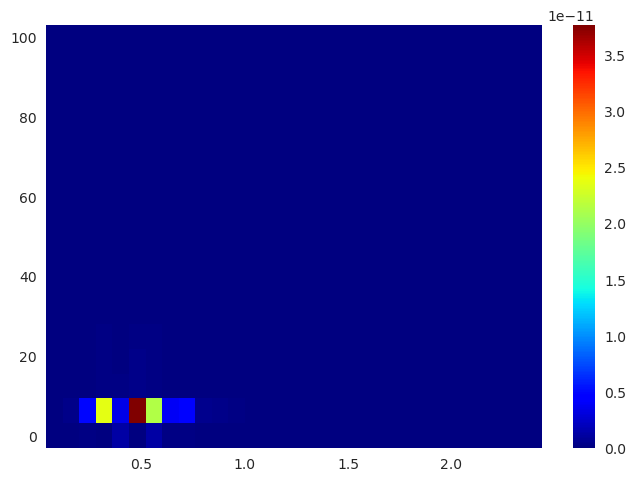

In [18]:
def compute_spectrogram(sig, nperseg, noverlap, window):
    time_step = 0.005
    sample_freq = 1 / time_step
    sig = np.array(max_erg[sig])
    freqs, times, Sxx = signal.spectrogram(sig, fs = sample_freq, nperseg = nperseg, noverlap = noverlap, window = window)
    
    return freqs, times, Sxx

freqs, times, Sxx = compute_spectrogram('3', nperseg = 32, noverlap = 16, window = 'tukey')

plt.pcolormesh(times, freqs, Sxx, cmap = 'jet')
plt.colorbar()

In [19]:
def get_features(sig, nperseg, noverlap, window):
    freqs, times, Sxx = compute_spectrogram(sig, nperseg, noverlap, window)
    num_t, num_f = Sxx.shape
    quadrant1 = Sxx[:num_t//2, :num_f//2]  # Top-left quadrant
    quadrant2 = Sxx[:num_t//2, num_f//2:]  # Top-right quadrant
    quadrant3 = Sxx[num_t//2:, :num_f//2]  # Bottom-left quadrant
    quadrant4 = Sxx[num_t//2:, num_f//2:]  # Bottom-right quadrant
#     print(f"q1: {quadrant1}, q2: {quadrant2}, q3: {quadrant3}, q4: {quadrant4}")

    
    q1spectrum = quadrant1.flatten()
    q2spectrum = quadrant2.flatten()
    q3spectrum = quadrant3.flatten()
    q4spectrum = quadrant4.flatten()
#     print(f"q1s: {q1spectrum}, q2s: {q2spectrum}, q3s: {q3spectrum}, q4s: {q4spectrum}")

#     if len(q1spectrum) == 0:
#         print(f"empty array at {sig}, {q1spectrum}, {quadrant1}")
#         return

    q1bmin = np.min(q1spectrum)
    q1bmedian = np.median(q1spectrum)
    q1bmax = np.max(q1spectrum)
    q1bmean = np.mean(q1spectrum)
    
    q2bmin = np.min(q2spectrum)
    q2bmedian = np.median(q2spectrum)
    q2bmax = np.max(q2spectrum)
    q2bmean = np.mean(q2spectrum)
    
    q3bmin = np.min(q3spectrum)
    q3bmedian = np.median(q3spectrum)
    q3bmax = np.max(q3spectrum)
    q3bmean = np.mean(q3spectrum)
    
    q4bmin = np.min(q4spectrum)
    q4bmedian = np.median(q4spectrum)
    q4bmax = np.max(q4spectrum)
    q4bmean = np.mean(q4spectrum)
    
    return q1bmin, q1bmedian, q1bmax, q1bmean, q2bmin, q2bmedian, q2bmax, q2bmean, q3bmin, q3bmedian, q3bmax, q3bmean, q4bmin, q4bmedian, q4bmax, q4bmean

In [20]:
# get_features('17.1', 32, 16, 'tukey')

In [21]:
# def get_parameters():
#     size, overlap, name = None, None, None
#     for n in NFFTS:
#         size = n
#     for o in overlaps:
#         overlap = o
#     for w in windows:
#         name = w
#     # use random.choice instead of loop
#     # then loop through the signals instead
#     return size, overlap, name

# print(get_parameters())

In [22]:
import random
def get_parameters():
    window_type = random.choice(windows)
    
    window_size = random.choice(NFFTS)

    overlap = random.choice(overlaps)
    
    while overlap >= window_size:
        overlap = random.choice(overlaps)

#     if overlap >= window_size:
#         window_size = random.choice(NFFTS)
#         overlap = random.choice(overlaps)
#     else:
#         return window_size, overlap, window_type
#         print(window_size, overlap, window_type)


    
    return window_size, overlap, window_type

#     print(window_size, overlap, window_type)
    
# get_parameters()

In [23]:
dfeatures = pd.DataFrame(columns = ['params', 'q1bmin', 'q1bmedian', 'q1bmax', 'q1bmean', 'q2bmin', 'q2bmedian', 'q2bmax', 'q2bmean', 'q3bmin', 'q3bmedian', 'q3bmax', 'q3bmean', 'q4bmin', 'q4bmedian', 'q4bmax', 'q4bmean', 'pat_no'])
dfeatures

,params,q1bmin,q1bmedian,q1bmax,q1bmean,q2bmin,q2bmedian,q2bmax,q2bmean,q3bmin,q3bmedian,q3bmax,q3bmean,q4bmin,q4bmedian,q4bmax,q4bmean,pat_no


In [24]:
diagdata.iloc[0]

3         healthy
5       unhealthy
6       unhealthy
6.1     unhealthy
6.2     unhealthy
15        healthy
17        healthy
17.1      healthy
Name: 0, dtype: object

In [25]:
for _ in range(len(data.columns)):
    window_size, overlap, window_type = get_parameters()
    for col in data.columns:
        
        q1bmin, q1bmedian, q1bmax, q1bmean, q2bmin, q2bmedian, q2bmax, q2bmean, q3bmin, q3bmedian, q3bmax, q3bmean, q4bmin, q4bmedian, q4bmax, q4bmean = get_features(str(col), window_size, overlap, window_type)
        
        new_dict = {'params': f'{window_type}{window_size}{overlap}', 'q1bmin': q1bmin, 'q1bmedian': q1bmedian, 'q1bmax': q1bmax, 'q1bmean': q1bmax, 'q2bmin': q2bmin, 'q2bmedian': q2bmedian, 'q2bmax': q2bmax, 'q2bmean': q2bmax, 'q3bmin': q3bmin, 'q3bmedian': q3bmedian, 'q3bmax': q3bmax, 'q3bmean': q3bmax, 'q4bmin': q4bmin, 'q4bmedian': q4bmedian, 'q4bmax': q4bmax, 'q4bmean': q4bmax, 'pat_no': col}
        new_features = pd.DataFrame(data = new_dict, index = range(0, len(new_dict)))
        dfeatures = pd.concat([dfeatures, new_features], ignore_index = True)

In [26]:
# new_features_list = []
# for col in data.columns:
#     print(col)
#     window_size, overlap, window_type = get_parameters()
#     bmin, bmedian, bmax, bmean = get_features(str(col), window_size, overlap, window_type)
#     new_dict = {'params': f'{window_type}{window_size}{overlap}', 'bmin': bmin, 'bmedian': bmedian, 'bmax': bmax, 'bmean': bmean, 'pat_no': col}
#     new_features = pd.DataFrame(data = new_dict, index = range(0, len(new_dict)))
#     new_features_list.append(new_features)
# dfeatures = pd.concat(new_features_list, ignore_index = True)
    
# # dfeatures

In [27]:
# transposed_diagdata = diagdata.T
# transposed_diagdata.index.name = 'pat_no'
# transposed_diagdata.columns = ['targets']
# transposed_diagdata

In [28]:
T_diagnoses = diag_max_erg.T
T_diagnoses.index.name = 'pat_no'
T_diagnoses.columns = ['targets']
T_diagnoses

,targets
pat_no,
3,unhealthy
3.1,healthy
5,unhealthy
6,unhealthy
6.1,unhealthy
...,...
1962.1,unhealthy
1963,unhealthy
1963.1,unhealthy


In [29]:
dfeatures = dfeatures.merge(T_diagnoses, on = 'pat_no', how = 'left')

In [50]:
dfeatures.head(30)

,params,q1bmin,q1bmedian,q1bmax,q1bmean,q2bmin,q2bmedian,q2bmax,q2bmean,q3bmin,q3bmedian,q3bmax,q3bmean,q4bmin,q4bmedian,q4bmax,q4bmean,pat_no,targets
0,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
1,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
2,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
3,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
4,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
5,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
6,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
7,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
8,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy
9,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0,3,unhealthy


In [31]:
targets = dfeatures.drop_duplicates().reset_index(drop = True)['targets']
targets

0     unhealthy
1     unhealthy
2     unhealthy
3     unhealthy
4     unhealthy
        ...    
59    unhealthy
60    unhealthy
61      healthy
62      healthy
63      healthy
Name: targets, Length: 64, dtype: object

In [32]:
sampled_features = dfeatures.drop_duplicates().drop(['pat_no', 'targets'], axis = 1).reset_index(drop = True)

In [33]:
sampled_features

,params,q1bmin,q1bmedian,q1bmax,q1bmean,q2bmin,q2bmedian,q2bmax,q2bmean,q3bmin,q3bmedian,q3bmax,q3bmean,q4bmin,q4bmedian,q4bmax,q4bmean
0,blackman42,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,4.591765e-14,4.591765e-14,0.0,0.0,0.0,0.0
1,blackman42,0.0,5.373556e-16,1.453484e-14,1.453484e-14,0.0,0.0,0.0,0.0,0.0,1.024126e-16,2.918361e-14,2.918361e-14,0.0,0.0,0.0,0.0
2,blackman42,0.0,1.309251e-03,1.563196e-01,1.563196e-01,0.0,0.0,0.0,0.0,0.0,2.850310e-04,3.151266e-01,3.151266e-01,0.0,0.0,0.0,0.0
3,blackman42,0.0,2.763489e-16,2.539555e-14,2.539555e-14,0.0,0.0,0.0,0.0,0.0,8.155369e-17,5.099332e-14,5.099332e-14,0.0,0.0,0.0,0.0
4,blackman42,0.0,6.094896e-16,3.930948e-14,3.930948e-14,0.0,0.0,0.0,0.0,0.0,1.528428e-16,7.896041e-14,7.896041e-14,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,blackman164,0.0,3.514105e-15,1.933158e-12,1.933158e-12,0.0,0.0,0.0,0.0,0.0,7.916788e-19,9.160053e-17,9.160053e-17,0.0,0.0,0.0,0.0
60,blackman164,0.0,6.468924e-15,2.851484e-12,2.851484e-12,0.0,0.0,0.0,0.0,0.0,1.670468e-18,1.028729e-16,1.028729e-16,0.0,0.0,0.0,0.0
61,blackman164,0.0,8.198615e-03,3.560715e+00,3.560715e+00,0.0,0.0,0.0,0.0,0.0,3.259501e-07,1.062872e-04,1.062872e-04,0.0,0.0,0.0,0.0
62,blackman164,0.0,8.177451e-15,1.164844e-12,1.164844e-12,0.0,0.0,0.0,0.0,0.0,6.655614e-19,2.579511e-16,2.579511e-16,0.0,0.0,0.0,0.0


In Scikit-learn, it noted that the current DT implementation doesn't work with categorical variables. then what does that mean for my `params` variables

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
import sklearn.metrics
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [35]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.1 MB/s eta 0:00:00


In [36]:
from dtreeviz.trees import *

### Label Encoding of Targets

In [37]:
label = LabelEncoder()
label.fit(targets)
label.classes_

array(['healthy', 'unhealthy'], dtype=object)

In [38]:
encoded_targets = label.transform(targets)
encoded_targets

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [39]:
len(encoded_targets)

64

In [40]:
sampled_features_encoded = pd.get_dummies(sampled_features, sparse = True, columns = ['params'])

In [41]:
sampled_features_encoded

,q1bmin,q1bmedian,q1bmax,q1bmean,q2bmin,q2bmedian,q2bmax,q2bmean,q3bmin,q3bmedian,...,q4bmax,q4bmean,params_bartlett168,params_bartlett642,params_bartlett82,params_blackman164,params_blackman42,params_blackman6416,params_blackmanharris164,params_blackmanharris648
0,0.0,2.364563e-16,2.281837e-14,2.281837e-14,0.0,0.0,0.0,0.0,0.0,8.184215e-17,...,0.0,0.0,0,0,0,0,1,0,0,0
1,0.0,5.373556e-16,1.453484e-14,1.453484e-14,0.0,0.0,0.0,0.0,0.0,1.024126e-16,...,0.0,0.0,0,0,0,0,1,0,0,0
2,0.0,1.309251e-03,1.563196e-01,1.563196e-01,0.0,0.0,0.0,0.0,0.0,2.850310e-04,...,0.0,0.0,0,0,0,0,1,0,0,0
3,0.0,2.763489e-16,2.539555e-14,2.539555e-14,0.0,0.0,0.0,0.0,0.0,8.155369e-17,...,0.0,0.0,0,0,0,0,1,0,0,0
4,0.0,6.094896e-16,3.930948e-14,3.930948e-14,0.0,0.0,0.0,0.0,0.0,1.528428e-16,...,0.0,0.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,3.514105e-15,1.933158e-12,1.933158e-12,0.0,0.0,0.0,0.0,0.0,7.916788e-19,...,0.0,0.0,0,0,0,1,0,0,0,0
60,0.0,6.468924e-15,2.851484e-12,2.851484e-12,0.0,0.0,0.0,0.0,0.0,1.670468e-18,...,0.0,0.0,0,0,0,1,0,0,0,0
61,0.0,8.198615e-03,3.560715e+00,3.560715e+00,0.0,0.0,0.0,0.0,0.0,3.259501e-07,...,0.0,0.0,0,0,0,1,0,0,0,0
62,0.0,8.177451e-15,1.164844e-12,1.164844e-12,0.0,0.0,0.0,0.0,0.0,6.655614e-19,...,0.0,0.0,0,0,0,1,0,0,0,0


### Data Splitting

In [42]:
random_state = 42
X_train, X_val, y_train, y_val = train_test_split(sampled_features_encoded, encoded_targets, test_size = 0.4, random_state = random_state, stratify = targets)

In [43]:
# ohencoder = OneHotEncoder(sparse_output = True, handle_unknown = 'ignore')
# params_encoded = ohencoder.fit_transform(X_train[['params']])

In [44]:
# ohencoder.categories_

In [45]:
# params_encoded

In [46]:
# encoded_params = pd.
# encoded_params

In [47]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Cross-Validation error')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

In [48]:
max_depth = 7
min_samples_split = 15
max_leaf_nodes = 15

In [49]:
DT_clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, max_leaf_nodes = max_leaf_nodes)
DT_clf.fit(X_train, y_train)
scoring = {"ACC": 'accuracy'}
cross_validation(sampled_features_encoded, targets, DT_clf, scoring, StratifiedKFold(n_splits = 5))
y_predict = DT_clf.predict(X_val)
print('test error')
print('ACC: %.4f' % acc(y_predict, y_val))
print('F1: %.4f' % f1(y_predict, y_val, average = 'micro'))
print(classification_report(y_val, y_predict, target_names = label.classes_))

Cross-Validation error


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.I

,fit_time,score_time,test_ACC
0,0.007087,0.003848,0.615385
1,0.005714,0.003281,0.615385
2,0.005625,0.002805,0.615385
3,0.005517,0.002764,0.692308
4,0.005546,0.002750,0.583333




test_ACC    0.624359
dtype: float64
test error
ACC: 0.4615
F1: 0.4615
              precision    recall  f1-score   support

     healthy       0.17      0.10      0.12        10
   unhealthy       0.55      0.69      0.61        16

    accuracy                           0.46        26
   macro avg       0.36      0.39      0.37        26
weighted avg       0.40      0.46      0.42        26



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
